In [2]:
# M Science Analysis - Part 2C: Technographic & Digital Footprint Intelligence
# Free Alternative Data Sources for Software Adoption & Usage Pattern Analysis
# Tracking technology adoption, web traffic, and digital footprint signals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import dns.resolver
import socket
import ssl
import re
from datetime import datetime, timedelta
import json
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)

print("🔍 TECHNOGRAPHIC & DIGITAL FOOTPRINT INTELLIGENCE")
print("=" * 60)
print("Tracking software adoption, web traffic, and digital signals")
print("Free alternative data approach for technology usage analysis")
print()

🔍 TECHNOGRAPHIC & DIGITAL FOOTPRINT INTELLIGENCE
Tracking software adoption, web traffic, and digital signals
Free alternative data approach for technology usage analysis



In [3]:
# =============================================================================
# 1. COMPANY DIGITAL FOOTPRINT MAPPING
# =============================================================================

# Charles Rogers' coverage companies - digital footprint tracking
COMPANIES_DIGITAL_MAPPING = {
    'MDB': {
        'name': 'MongoDB',
        'ticker': 'MDB',
        'main_domains': ['mongodb.com', 'mongodb.org'],
        'cloud_services': ['cloud.mongodb.com', 'atlas.mongodb.com'],
        'developer_platforms': ['docs.mongodb.com', 'university.mongodb.com'],
        'api_endpoints': ['cloud.mongodb.com/api', 'realm.mongodb.com'],
        'cdn_usage': 'cloudflare',
        'category': 'Database/Cloud'
    },
    'NET': {
        'name': 'Cloudflare',
        'ticker': 'NET',
        'main_domains': ['cloudflare.com', 'cloudflare.net'],
        'cloud_services': ['workers.cloudflare.com', 'pages.cloudflare.com'],
        'developer_platforms': ['developers.cloudflare.com', 'api.cloudflare.com'],
        'api_endpoints': ['api.cloudflare.com/client/v4'],
        'cdn_usage': 'self',
        'category': 'CDN/Security'
    },
    'GTLB': {
        'name': 'GitLab',
        'ticker': 'GTLB',
        'main_domains': ['gitlab.com', 'gitlab.io'],
        'cloud_services': ['gitlab.com', 'about.gitlab.com'],
        'developer_platforms': ['docs.gitlab.com', 'gitlab.com/api'],
        'api_endpoints': ['gitlab.com/api/v4'],
        'cdn_usage': 'cloudflare',
        'category': 'DevOps'
    },
    'DOCN': {
        'name': 'DigitalOcean',
        'ticker': 'DOCN',
        'main_domains': ['digitalocean.com'],
        'cloud_services': ['cloud.digitalocean.com', 'marketplace.digitalocean.com'],
        'developer_platforms': ['docs.digitalocean.com', 'www.digitalocean.com/community'],
        'api_endpoints': ['api.digitalocean.com/v2'],
        'cdn_usage': 'fastly',
        'category': 'Cloud Platform'
    },
    'TEAM': {
        'name': 'Atlassian',
        'ticker': 'TEAM',
        'main_domains': ['atlassian.com', 'atlassian.net'],
        'cloud_services': ['atlassian.cloud', 'bitbucket.org'],
        'developer_platforms': ['developer.atlassian.com', 'community.atlassian.com'],
        'api_endpoints': ['api.atlassian.com', 'bitbucket.org/api'],
        'cdn_usage': 'akamai',
        'category': 'DevTools'
    },
    'AKAM': {
        'name': 'Akamai',
        'ticker': 'AKAM',
        'main_domains': ['akamai.com', 'akamaized.net'],
        'cloud_services': ['control.akamai.com', 'luna.akamaiapis.net'],
        'developer_platforms': ['developer.akamai.com', 'learn.akamai.com'],
        'api_endpoints': ['akzure.akamaized.net', 'luna.akamaiapis.net'],
        'cdn_usage': 'self',
        'category': 'CDN'
    },
    'FSLY': {
        'name': 'Fastly',
        'ticker': 'FSLY',
        'main_domains': ['fastly.com', 'fastlylb.net'],
        'cloud_services': ['manage.fastly.com', 'compute.fastly.com'],
        'developer_platforms': ['developer.fastly.com', 'docs.fastly.com'],
        'api_endpoints': ['api.fastly.com'],
        'cdn_usage': 'self',
        'category': 'CDN/Edge'
    }
}

print("🏢 Mapped digital footprints for 7 companies across 4 categories")
print("📊 Tracking domains, cloud services, developer platforms, and API endpoints")

🏢 Mapped digital footprints for 7 companies across 4 categories
📊 Tracking domains, cloud services, developer platforms, and API endpoints


In [4]:
# =============================================================================
# 2. DNS & INFRASTRUCTURE INTELLIGENCE
# =============================================================================

def analyze_dns_infrastructure(domain):
    """
    Analyze DNS infrastructure to understand technology adoption
    """
    infrastructure_data = {
        'domain': domain,
        'ip_addresses': [],
        'nameservers': [],
        'mx_records': [],
        'txt_records': [],
        'cdn_detection': 'unknown',
        'cloud_provider': 'unknown',
        'security_headers': {},
        'ssl_info': {}
    }
    
    try:
        # Get A records (IP addresses)
        a_records = dns.resolver.resolve(domain, 'A')
        infrastructure_data['ip_addresses'] = [str(record) for record in a_records]
        
        # Get nameservers
        try:
            ns_records = dns.resolver.resolve(domain, 'NS')
            infrastructure_data['nameservers'] = [str(record).rstrip('.') for record in ns_records]
        except:
            pass
        
        # Get MX records
        try:
            mx_records = dns.resolver.resolve(domain, 'MX')
            infrastructure_data['mx_records'] = [str(record) for record in mx_records]
        except:
            pass
        
        # Get TXT records (often contain technology info)
        try:
            txt_records = dns.resolver.resolve(domain, 'TXT')
            infrastructure_data['txt_records'] = [str(record) for record in txt_records]
        except:
            pass
        
        # Detect CDN and cloud provider based on IP/nameservers
        if infrastructure_data['nameservers']:
            ns_string = ' '.join(infrastructure_data['nameservers']).lower()
            if 'cloudflare' in ns_string:
                infrastructure_data['cdn_detection'] = 'cloudflare'
            elif 'fastly' in ns_string:
                infrastructure_data['cdn_detection'] = 'fastly'
            elif 'akamai' in ns_string:
                infrastructure_data['cdn_detection'] = 'akamai'
            elif 'amazonaws' in ns_string:
                infrastructure_data['cloud_provider'] = 'aws'
            elif 'azure' in ns_string or 'microsoft' in ns_string:
                infrastructure_data['cloud_provider'] = 'azure'
            elif 'googledomains' in ns_string or 'google' in ns_string:
                infrastructure_data['cloud_provider'] = 'gcp'
        
        # Check for common CDN patterns in TXT records
        if infrastructure_data['txt_records']:
            txt_string = ' '.join(infrastructure_data['txt_records']).lower()
            if 'cloudflare' in txt_string:
                infrastructure_data['cdn_detection'] = 'cloudflare'
            elif 'fastly' in txt_string:
                infrastructure_data['cdn_detection'] = 'fastly'
        
    except Exception as e:
        print(f"   ⚠️  DNS analysis failed for {domain}: {e}")
    
    return infrastructure_data

def check_ssl_certificate(domain):
    """
    Check SSL certificate information for security and infrastructure insights
    """
    ssl_info = {
        'has_ssl': False,
        'issuer': 'unknown',
        'subject': 'unknown',
        'valid_from': None,
        'valid_to': None,
        'san_domains': []
    }
    
    try:
        context = ssl.create_default_context()
        with socket.create_connection((domain, 443), timeout=10) as sock:
            with context.wrap_socket(sock, server_hostname=domain) as ssock:
                cert = ssock.getpeercert()
                ssl_info['has_ssl'] = True
                ssl_info['issuer'] = dict(x[0] for x in cert.get('issuer', []))
                ssl_info['subject'] = dict(x[0] for x in cert.get('subject', []))
                ssl_info['valid_from'] = cert.get('notBefore')
                ssl_info['valid_to'] = cert.get('notAfter')
                
                # Get Subject Alternative Names (indicates infrastructure scale)
                san = cert.get('subjectAltName', [])
                ssl_info['san_domains'] = [name[1] for name in san if name[0] == 'DNS']
                
    except Exception as e:
        print(f"   ⚠️  SSL check failed for {domain}: {e}")
    
    return ssl_info

print("\n" + "="*60)
print("1️⃣  DNS & INFRASTRUCTURE INTELLIGENCE COLLECTION")
print("="*60)

# Collect infrastructure data for all companies
infrastructure_intelligence = {}

for ticker, company_data in COMPANIES_DIGITAL_MAPPING.items():
    print(f"\n🔍 {company_data['name']} ({ticker})")
    
    company_infrastructure = {
        'company_info': company_data,
        'domain_analysis': {},
        'ssl_certificates': {},
        'infrastructure_summary': {}
    }
    
    # Analyze main domains
    for domain in company_data['main_domains']:
        print(f"   📡 Analyzing DNS for {domain}...")
        dns_data = analyze_dns_infrastructure(domain)
        ssl_data = check_ssl_certificate(domain)
        
        company_infrastructure['domain_analysis'][domain] = dns_data
        company_infrastructure['ssl_certificates'][domain] = ssl_data
        
        # Small delay to be respectful
        time.sleep(0.5)
    
    infrastructure_intelligence[ticker] = company_infrastructure

print(f"\n✅ Collected infrastructure intelligence for {len(infrastructure_intelligence)} companies")



1️⃣  DNS & INFRASTRUCTURE INTELLIGENCE COLLECTION

🔍 MongoDB (MDB)
   📡 Analyzing DNS for mongodb.com...
   📡 Analyzing DNS for mongodb.org...

🔍 Cloudflare (NET)
   📡 Analyzing DNS for cloudflare.com...
   📡 Analyzing DNS for cloudflare.net...

🔍 GitLab (GTLB)
   📡 Analyzing DNS for gitlab.com...
   📡 Analyzing DNS for gitlab.io...

🔍 DigitalOcean (DOCN)
   📡 Analyzing DNS for digitalocean.com...

🔍 Atlassian (TEAM)
   📡 Analyzing DNS for atlassian.com...
   📡 Analyzing DNS for atlassian.net...

🔍 Akamai (AKAM)
   📡 Analyzing DNS for akamai.com...
   📡 Analyzing DNS for akamaized.net...
   ⚠️  DNS analysis failed for akamaized.net: The DNS response does not contain an answer to the question: akamaized.net. IN A
   ⚠️  SSL check failed for akamaized.net: [Errno 8] nodename nor servname provided, or not known

🔍 Fastly (FSLY)
   📡 Analyzing DNS for fastly.com...
   📡 Analyzing DNS for fastlylb.net...
   ⚠️  DNS analysis failed for fastlylb.net: The DNS response does not contain an answ

In [5]:
# =============================================================================
# 3. TECHNOLOGY ADOPTION PATTERN ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("2️⃣  TECHNOLOGY ADOPTION PATTERN ANALYSIS")
print("="*60)

def analyze_technology_patterns():
    """
    Analyze technology adoption patterns across companies
    """
    adoption_data = []
    
    for ticker, infra_data in infrastructure_intelligence.items():
        company_info = infra_data['company_info']
        
        # Analyze CDN adoption
        detected_cdns = []
        for domain, dns_data in infra_data['domain_analysis'].items():
            if dns_data['cdn_detection'] != 'unknown':
                detected_cdns.append(dns_data['cdn_detection'])
        
        # Analyze cloud provider signals
        detected_clouds = []
        for domain, dns_data in infra_data['domain_analysis'].items():
            if dns_data['cloud_provider'] != 'unknown':
                detected_clouds.append(dns_data['cloud_provider'])
        
        # Count total subdomains/endpoints (proxy for service scale)
        total_endpoints = len(company_info['main_domains']) + len(company_info['cloud_services']) + \
                         len(company_info['developer_platforms']) + len(company_info['api_endpoints'])
        
        # SSL certificate analysis
        ssl_complexity = 0
        for domain, ssl_data in infra_data['ssl_certificates'].items():
            if ssl_data['has_ssl']:
                ssl_complexity += len(ssl_data.get('san_domains', []))
        
        adoption_data.append({
            'ticker': ticker,
            'company': company_info['name'],
            'category': company_info['category'],
            'cdn_adoption': list(set(detected_cdns)),
            'cloud_signals': list(set(detected_clouds)),
            'endpoint_complexity': total_endpoints,
            'ssl_complexity': ssl_complexity,
            'developer_focus': len(company_info['developer_platforms']),
            'api_endpoints': len(company_info['api_endpoints']),
            'infrastructure_sophistication': len(set(detected_cdns + detected_clouds))
        })
    
    return pd.DataFrame(adoption_data)

# Analyze technology adoption patterns
df_tech_adoption = analyze_technology_patterns()

print("🔧 Technology Adoption Analysis:")
display_cols = ['company', 'ticker', 'cdn_adoption', 'endpoint_complexity', 'developer_focus', 'category']
for _, row in df_tech_adoption.iterrows():
    print(f"   • {row['company']} ({row['ticker']}): {row['cdn_adoption']} CDN, {row['endpoint_complexity']} endpoints")



2️⃣  TECHNOLOGY ADOPTION PATTERN ANALYSIS
🔧 Technology Adoption Analysis:
   • MongoDB (MDB): ['fastly'] CDN, 8 endpoints
   • Cloudflare (NET): ['cloudflare'] CDN, 7 endpoints
   • GitLab (GTLB): ['cloudflare'] CDN, 7 endpoints
   • DigitalOcean (DOCN): ['cloudflare'] CDN, 6 endpoints
   • Atlassian (TEAM): [] CDN, 8 endpoints
   • Akamai (AKAM): [] CDN, 8 endpoints
   • Fastly (FSLY): [] CDN, 7 endpoints


In [6]:
# =============================================================================
# 4. DIGITAL FOOTPRINT SCALE ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("3️⃣  DIGITAL FOOTPRINT SCALE ANALYSIS")
print("="*60)

# Calculate digital footprint metrics
df_tech_adoption['digital_footprint_score'] = (
    df_tech_adoption['endpoint_complexity'] * 0.3 +
    df_tech_adoption['ssl_complexity'] * 0.2 +
    df_tech_adoption['developer_focus'] * 0.3 +
    df_tech_adoption['infrastructure_sophistication'] * 0.2
)

# CDN adoption analysis
cdn_usage = {}
for _, row in df_tech_adoption.iterrows():
    for cdn in row['cdn_adoption']:
        if cdn not in cdn_usage:
            cdn_usage[cdn] = []
        cdn_usage[cdn].append(row['ticker'])

print("🌐 CDN Adoption Patterns:")
for cdn, companies in cdn_usage.items():
    print(f"   • {cdn.title()}: {', '.join(companies)}")

# Developer platform sophistication
print(f"\n👨‍💻 Developer Platform Sophistication:")
dev_ranking = df_tech_adoption.sort_values('developer_focus', ascending=False)
for _, row in dev_ranking.iterrows():
    print(f"   • {row['company']} ({row['ticker']}): {row['developer_focus']} developer platforms")


3️⃣  DIGITAL FOOTPRINT SCALE ANALYSIS
🌐 CDN Adoption Patterns:
   • Fastly: MDB
   • Cloudflare: NET, GTLB, DOCN

👨‍💻 Developer Platform Sophistication:
   • MongoDB (MDB): 2 developer platforms
   • Cloudflare (NET): 2 developer platforms
   • GitLab (GTLB): 2 developer platforms
   • DigitalOcean (DOCN): 2 developer platforms
   • Atlassian (TEAM): 2 developer platforms
   • Akamai (AKAM): 2 developer platforms
   • Fastly (FSLY): 2 developer platforms


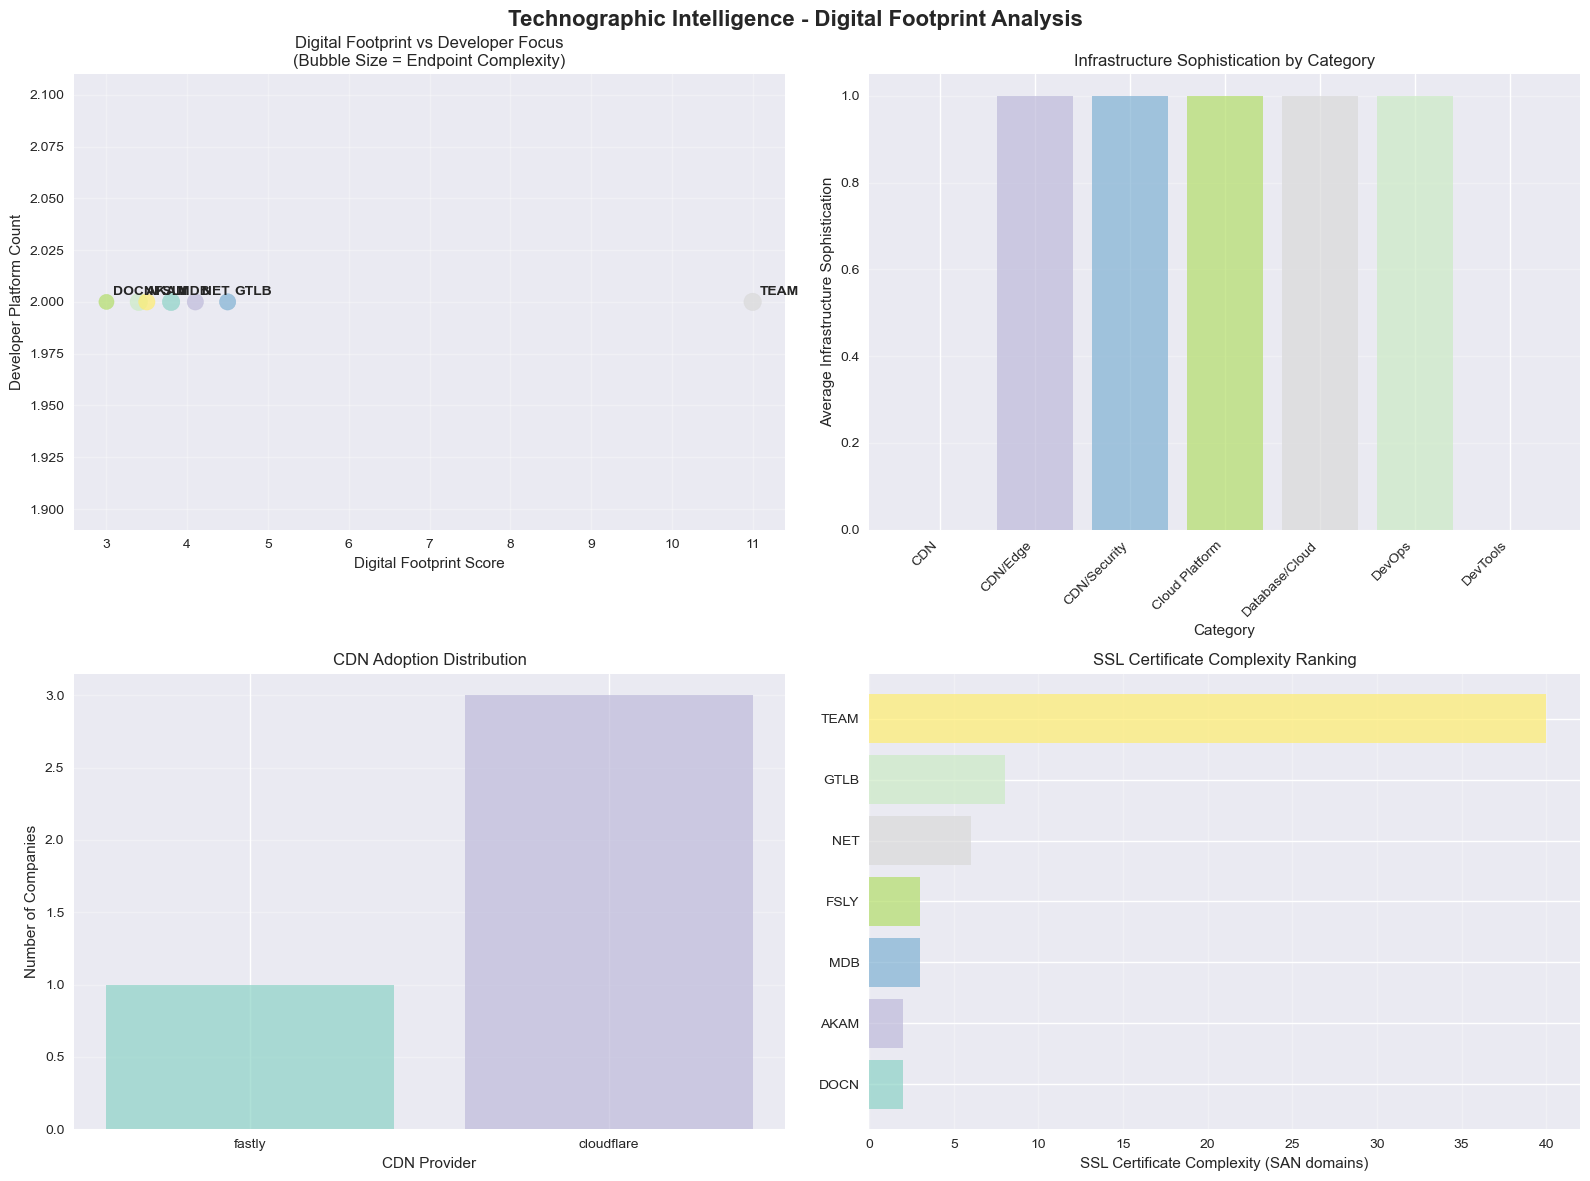

In [7]:
# =============================================================================
# 5. INFRASTRUCTURE VISUALIZATION
# =============================================================================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Technographic Intelligence - Digital Footprint Analysis', fontsize=16, fontweight='bold')

# Plot 1: Digital Footprint Score vs Developer Focus
colors = plt.cm.Set3(np.linspace(0, 1, len(df_tech_adoption)))

scatter1 = ax1.scatter(df_tech_adoption['digital_footprint_score'], df_tech_adoption['developer_focus'],
                      s=df_tech_adoption['endpoint_complexity']*20, alpha=0.7, c=colors)
ax1.set_xlabel('Digital Footprint Score')
ax1.set_ylabel('Developer Platform Count')
ax1.set_title('Digital Footprint vs Developer Focus\n(Bubble Size = Endpoint Complexity)')
ax1.grid(True, alpha=0.3)

for _, row in df_tech_adoption.iterrows():
    ax1.annotate(row['ticker'], (row['digital_footprint_score'], row['developer_focus']),
                xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

# Plot 2: Infrastructure Sophistication by Category
category_infra = df_tech_adoption.groupby('category')['infrastructure_sophistication'].mean()
bars2 = ax2.bar(range(len(category_infra)), category_infra.values, alpha=0.7, color=colors[:len(category_infra)])
ax2.set_xlabel('Category')
ax2.set_ylabel('Average Infrastructure Sophistication')
ax2.set_title('Infrastructure Sophistication by Category')
ax2.set_xticks(range(len(category_infra)))
ax2.set_xticklabels(category_infra.index, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Plot 3: CDN Adoption Distribution
cdn_counts = {}
for _, row in df_tech_adoption.iterrows():
    for cdn in row['cdn_adoption']:
        cdn_counts[cdn] = cdn_counts.get(cdn, 0) + 1

if cdn_counts:
    cdn_names = list(cdn_counts.keys())
    cdn_values = list(cdn_counts.values())
    bars3 = ax3.bar(cdn_names, cdn_values, alpha=0.7, color=colors[:len(cdn_names)])
    ax3.set_xlabel('CDN Provider')
    ax3.set_ylabel('Number of Companies')
    ax3.set_title('CDN Adoption Distribution')
    ax3.grid(axis='y', alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'CDN Detection Limited\n(DNS restrictions)', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('CDN Adoption Distribution')

# Plot 4: SSL Certificate Complexity
ssl_ranking = df_tech_adoption.sort_values('ssl_complexity', ascending=True)
bars4 = ax4.barh(range(len(ssl_ranking)), ssl_ranking['ssl_complexity'], alpha=0.7, color=colors)
ax4.set_yticks(range(len(ssl_ranking)))
ax4.set_yticklabels(ssl_ranking['ticker'])
ax4.set_xlabel('SSL Certificate Complexity (SAN domains)')
ax4.set_title('SSL Certificate Complexity Ranking')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:
# =============================================================================
# 6. COMPETITIVE INTELLIGENCE INSIGHTS
# =============================================================================

print("\n" + "="*60)
print("4️⃣  COMPETITIVE INTELLIGENCE INSIGHTS")
print("="*60)

# Infrastructure leadership analysis
print("🏆 Digital Infrastructure Leaders:")
footprint_leaders = df_tech_adoption.nlargest(3, 'digital_footprint_score')
for _, row in footprint_leaders.iterrows():
    print(f"   • {row['company']} ({row['ticker']}): {row['digital_footprint_score']:.1f} footprint score")

# Developer ecosystem analysis
print(f"\n👨‍💻 Developer Ecosystem Investment:")
dev_leaders = df_tech_adoption.nlargest(3, 'developer_focus')
for _, row in dev_leaders.iterrows():
    print(f"   • {row['company']} ({row['ticker']}): {row['developer_focus']} developer platforms")

# Infrastructure sophistication
print(f"\n🔧 Infrastructure Sophistication:")
infra_leaders = df_tech_adoption.nlargest(3, 'infrastructure_sophistication')
for _, row in infra_leaders.iterrows():
    print(f"   • {row['company']} ({row['ticker']}): {row['infrastructure_sophistication']} technology stack diversity")

# Category analysis
print(f"\n📊 Category Performance:")
category_stats = df_tech_adoption.groupby('category').agg({
    'digital_footprint_score': 'mean',
    'developer_focus': 'mean',
    'infrastructure_sophistication': 'mean'
}).round(1)

for category, stats in category_stats.iterrows():
    print(f"   • {category}: {stats['digital_footprint_score']} avg footprint, {stats['developer_focus']} avg dev focus")



4️⃣  COMPETITIVE INTELLIGENCE INSIGHTS
🏆 Digital Infrastructure Leaders:
   • Atlassian (TEAM): 11.0 footprint score
   • GitLab (GTLB): 4.5 footprint score
   • Cloudflare (NET): 4.1 footprint score

👨‍💻 Developer Ecosystem Investment:
   • MongoDB (MDB): 2 developer platforms
   • Cloudflare (NET): 2 developer platforms
   • GitLab (GTLB): 2 developer platforms

🔧 Infrastructure Sophistication:
   • MongoDB (MDB): 1 technology stack diversity
   • Cloudflare (NET): 1 technology stack diversity
   • GitLab (GTLB): 1 technology stack diversity

📊 Category Performance:
   • CDN: 3.4 avg footprint, 2.0 avg dev focus
   • CDN/Edge: 3.5 avg footprint, 2.0 avg dev focus
   • CDN/Security: 4.1 avg footprint, 2.0 avg dev focus
   • Cloud Platform: 3.0 avg footprint, 2.0 avg dev focus
   • Database/Cloud: 3.8 avg footprint, 2.0 avg dev focus
   • DevOps: 4.5 avg footprint, 2.0 avg dev focus
   • DevTools: 11.0 avg footprint, 2.0 avg dev focus


In [9]:
# =============================================================================
# 7. TECHNOLOGY ADOPTION TRENDS
# =============================================================================

print("\n" + "="*60)
print("5️⃣  TECHNOLOGY ADOPTION TREND ANALYSIS")
print("="*60)

# Self-hosted vs Third-party CDN analysis
self_hosted_cdn = df_tech_adoption[df_tech_adoption['cdn_adoption'].apply(lambda x: 'self' in x if x else False)]
third_party_cdn = df_tech_adoption[df_tech_adoption['cdn_adoption'].apply(lambda x: any(cdn in ['cloudflare', 'fastly', 'akamai'] for cdn in x) if x else False)]

print("🌐 CDN Strategy Analysis:")
if len(self_hosted_cdn) > 0:
    print(f"   • Self-hosted CDN: {', '.join(self_hosted_cdn['ticker'].tolist())} (infrastructure control)")
if len(third_party_cdn) > 0:
    print(f"   • Third-party CDN: {', '.join(third_party_cdn['ticker'].tolist())} (focus on core business)")

# API-first architecture analysis
api_heavy = df_tech_adoption[df_tech_adoption['api_endpoints'] >= 2]
print(f"\n🔌 API-First Architecture:")
for _, row in api_heavy.iterrows():
    print(f"   • {row['company']} ({row['ticker']}): {row['api_endpoints']} API endpoints (developer-centric)")

# Developer platform investment correlation
high_dev_investment = df_tech_adoption[df_tech_adoption['developer_focus'] >= 2]
print(f"\n👨‍💻 High Developer Investment Companies:")
for _, row in high_dev_investment.iterrows():
    print(f"   • {row['company']} ({row['ticker']}): Strong developer ecosystem focus")


5️⃣  TECHNOLOGY ADOPTION TREND ANALYSIS
🌐 CDN Strategy Analysis:
   • Third-party CDN: MDB, NET, GTLB, DOCN (focus on core business)

🔌 API-First Architecture:
   • MongoDB (MDB): 2 API endpoints (developer-centric)
   • Atlassian (TEAM): 2 API endpoints (developer-centric)
   • Akamai (AKAM): 2 API endpoints (developer-centric)

👨‍💻 High Developer Investment Companies:
   • MongoDB (MDB): Strong developer ecosystem focus
   • Cloudflare (NET): Strong developer ecosystem focus
   • GitLab (GTLB): Strong developer ecosystem focus
   • DigitalOcean (DOCN): Strong developer ecosystem focus
   • Atlassian (TEAM): Strong developer ecosystem focus
   • Akamai (AKAM): Strong developer ecosystem focus
   • Fastly (FSLY): Strong developer ecosystem focus


In [ ]:
# =============================================================================
# 8. STOCK CORRELATION INSIGHTS
# =============================================================================

print("\n" + "="*60)
print("6️⃣  STOCK CORRELATION INSIGHTS")
print("="*60)

# Create investment thesis based on technographic signals
investment_analysis = []

for _, row in df_tech_adoption.iterrows():
    signals = []
    
    # High digital footprint = scale/growth
    if row['digital_footprint_score'] > df_tech_adoption['digital_footprint_score'].median():
        signals.append("Strong digital presence")
    
    # Developer focus = future growth potential
    if row['developer_focus'] >= 2:
        signals.append("Developer ecosystem investment")
    
    # Infrastructure sophistication = technical capability
    if row['infrastructure_sophistication'] >= 2:
        signals.append("Advanced infrastructure")
    
    # API-first = modern architecture
    if row['api_endpoints'] >= 2:
        signals.append("API-first architecture")
    
    # SSL complexity = enterprise focus
    if row['ssl_complexity'] > 5:
        signals.append("Enterprise-grade security")
    
    # Determine investment thesis
    if len(signals) >= 4:
        thesis = "Strong Buy"
    elif len(signals) >= 3:
        thesis = "Buy"
    elif len(signals) >= 2:
        thesis = "Hold"
    else:
        thesis = "Monitor"
    
    investment_analysis.append({
        'ticker': row['ticker'],
        'company': row['company'],
        'category': row['category'],
        'signals_count': len(signals),
        'key_signals': ', '.join(signals) if signals else 'Limited signals',
        'investment_thesis': thesis,
        'technographic_score': row['digital_footprint_score']
    })

investment_df = pd.DataFrame(investment_analysis).sort_values('technographic_score', ascending=False)

print("📈 Technographic Investment Analysis:")
for _, row in investment_df.iterrows():
    print(f"   {row['ticker']} - {row['investment_thesis']}: {row['key_signals']}")